In [1]:
from scipy.special import *
from scipy.stats import *
import numpy as np 
import math
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as pat

font = {'family': 'serif', 'serif': 'Times New Roman', 'weight': 'normal','size':15}
plt.rc('font',**font)

In [3]:
sinarray = [np.sin(i) for i in range(1,101)]
np.asarray(sinarray)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111,
       -0.99999021, -0.53657292,  0.42016704,  0.99060736,  0.65028784,
       -0.28790332, -0.96139749, -0.75098725,  0.14987721,  0.91294525,
        0.83665564, -0.00885131, -0.8462204 , -0.90557836, -0.13235175,
        0.76255845,  0.95637593,  0.27090579, -0.66363388, -0.98803162,
       -0.40403765,  0.55142668,  0.99991186,  0.52908269, -0.42818267,
       -0.99177885, -0.64353813,  0.29636858,  0.96379539,  0.74511316,
       -0.15862267, -0.91652155, -0.83177474,  0.01770193,  0.85090352,
        0.90178835,  0.12357312, -0.76825466, -0.95375265, -0.26237485,
        0.67022918,  0.98662759,  0.39592515, -0.55878905, -0.99975517,
       -0.521551  ,  0.43616476,  0.99287265,  0.63673801, -0.30481062,
       -0.96611777, -0.7391807 ,  0.1673557 ,  0.92002604,  0.82682868,
       -0.02655115, -0.85551998, -0.89792768, -0.11478481,  0.77

In [4]:
cosarray = [np.cos(i) for i in range(1,101)]
np.asarray(cosarray)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362,  0.28366219,
        0.96017029,  0.75390225, -0.14550003, -0.91113026, -0.83907153,
        0.0044257 ,  0.84385396,  0.90744678,  0.13673722, -0.75968791,
       -0.95765948, -0.27516334,  0.66031671,  0.98870462,  0.40808206,
       -0.54772926, -0.99996083, -0.53283302,  0.42417901,  0.99120281,
        0.64691932, -0.29213881, -0.96260587, -0.74805753,  0.15425145,
        0.91474236,  0.83422336, -0.01327675, -0.84857027, -0.90369221,
       -0.12796369,  0.76541405,  0.95507364,  0.26664293, -0.66693806,
       -0.98733928, -0.39998531,  0.5551133 ,  0.99984331,  0.52532199,
       -0.43217794, -0.99233547, -0.64014434,  0.30059254,  0.96496603,
        0.7421542 , -0.16299078, -0.91828279, -0.82930983,  0.02212676,
        0.85322011,  0.89986683,  0.11918014, -0.77108022, -0.95241298,
       -0.25810164,  0.67350716,  0.98589658,  0.39185723, -0.56245385,
       -0.99964746, -0.5177698 ,  0.44014302,  0.99339038,  0.63

<img src="411.png"/>

### Эмпирическое среднее

In [5]:
sin_sum = 0
for i in range(100):
    sin_sum += sinarray[i]
sin_mean = sin_sum / len(sinarray)
sin_mean

-0.0012717101366041973

In [6]:
np.mean(sinarray)

-0.0012717101366042016

### Эмпирическое стандартное отклонение

In [7]:
np.std(sinarray)

0.7090008871157724

In [8]:
sin_var = 0
for i in range(100):
    sin_var += (sinarray[i]-sin_mean)**2
sin_var = sin_var / len(sinarray)
sin_std = (sin_var)**(1/2)
sin_std

0.7090008871157725

<img src="412.png"/>

### Эмпирический четвёртый центральный момент

In [9]:
moment(sinarray,4)

0.37697988066557236

In [10]:
sin_sum = 0
moment = 4
for i in range(100):
    sin_sum += (sinarray[i])**moment
sin_centm_4 = sin_sum / len(sinarray)
sin_centm_4

0.3769739585116536

### Эмпирический эксцесс

In [11]:
kurtosis(sinarray)

-1.5081297338390796

In [12]:
excess = sin_centm_4/(sin_std)**4-3
excess

-1.5081531703294504

### Эмпирическая функция распределения

$${\displaystyle {\widehat {F}}_{n}(t)={\frac {{\mbox{количество элементов в выборке}}\leq t}{n}}={\frac {1}{n}}\sum _{i=1}^{n}\mathbf {1} _{X_{i}\leq t},}$$

In [13]:
en = 0
t = 0.6
for i in range(len(sinarray)):
    if sinarray[i] <= t:
        en += 1
En = en/len(sinarray)
En

0.7

<img src="413.png"/>

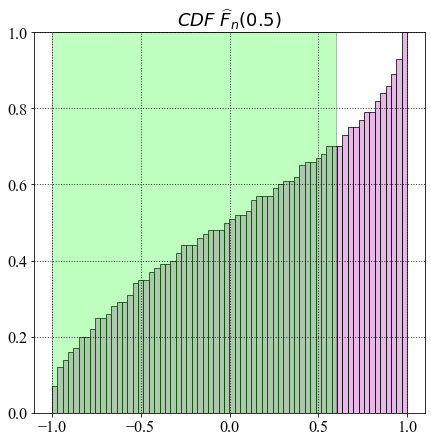

In [16]:
fig,ax =plt.subplots(figsize=(7, 7))
plt.tick_params(labelsize = 16)
plt.tick_params(labelsize = 16)
plt.grid(color='k', alpha=0.75, linestyle=':', linewidth=1)

plt.xlim(-1-0.1,1+0.1)
plt.ylim(0,1)

plt.title(r'$CDF \ \widehat {F}_{n}(0.5)$', fontweight='normal')


plt.hist(sinarray, bins=int(len(sinarray)/1.5), 
         cumulative=True, density = True, color = 'plum', edgecolor = 'k', lw = 1, alpha = 0.75)
ax.add_patch(pat.Rectangle((-1, 0), 1.6, 1, edgecolor = 'k',facecolor = 'lime', fill=True, alpha = 0.25))
plt.show()

<img src="414.png"/>

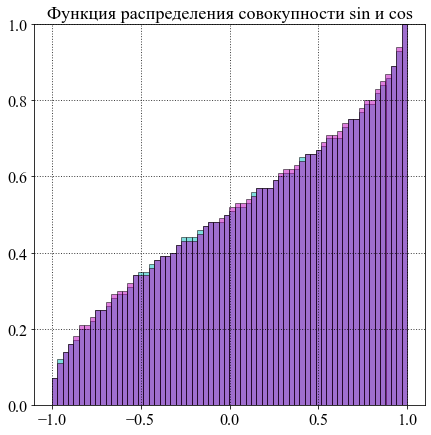

In [17]:
fig,ax =plt.subplots(figsize=(7, 7))
plt.tick_params(labelsize = 16)
plt.tick_params(labelsize = 16)
plt.grid(color='k', alpha=0.75, linestyle=':', linewidth=1)

plt.xlim(-1-0.1,1+0.1)
plt.ylim(0,1)

plt.title('Функция распределения cовокупности sin и cos', fontweight='normal')


plt.hist(sinarray, bins=int(len(sinarray)/1.5), 
         cumulative=True, density = True, color = 'c', edgecolor = 'k', lw = 1, alpha = 0.5)
plt.hist(cosarray, bins=int(len(cosarray)/1.5), 
         cumulative=True, density = True, color = 'm', edgecolor = 'k', lw = 1, alpha = 0.5)
plt.show()